# Taller 3 Métodos Numéricos

El objetivo del taller es ejercitar los temas de interpolación e integración numérica. Por tal motivo, se deben resolver los siguientes ejercicios y responder las preguntas justificando adecuadamente.

## Evaluación y entrega
- La evaluación será mediante un coloquio con los docentes durante la clase.
- El taller se realiza en grupos hasta 2 ó 3 personas.

In [1]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Ejercicio 1

## Ejercicio 1

Se desea construir una tabla de ocho cifras para la función $log(x)$ en el intervalo $(1,10)$, de tal manera que el error de la interpolación fragmentaria lineal sea menor a $10^{-6}$


* Determinar el tamaño del paso $h$ más grande posible y la cantidad de valores de la misma.

 **HINT:** Tener en cuenta que para cualquier x en el intervalo $(1,10)$, deberá existir un $j$  tal que  $x_{j} \leq x \leq x_{j+1}$ con $x_{j}= 1 + hj$ de manera tal que el polinomio interpolador lineal de Lagrange definido como
 
    $$ P(x) = L_{j}(x)f(x_{j}) + L_{j+1}(x)f(x_{j+1})$$ 
    
    en ese intervalo cumpla que el error de la interpolación verifica
    
    $$ |log(x) - P(x)| \leq 10^{6}$$   

**SOLUCIÓN:**

 <font color='red'>**COMPLETAR ACÁ**</font>

* Comparar y verifcar el error en puntos intermedios. Considerar usar la función [np.log(x)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) y [np.around](https://numpy.org/doc/stable/reference/generated/numpy.around.html)


In [ ]:
def interpolacion_lineal(x, tabla):
    '''
    Evalua x utilizando interpolacion lineal fragmentaria a partir de la tabla con precision de 8 digitos para log(x)
    '''    
    return None

h = ...
intervalo = ...
tabla = ...

# Verifiquemos la interpolación en puntos iniciales
xs = ...
ys = ...
assert(np.all(np.abs(ys - np.log(xs)) < 10**-6))

# Ahora consideremos  algunos puntos intermedios
xnew = ...
ynew = ...
assert(np.all(np.abs(ynew - np.log(xnew)) < 10**-6))

print("Ok")

## Ejercicio 2

* Dados los puntos $(-1,3), (1,1), (2,3), (3,7)$, determinar cuántos **polinomios** de grado $d$ existen que pasen por *todos* los puntos, para d $\in \{2, 3, 4\} $. Justificar



**SOLUCIÓN:**

 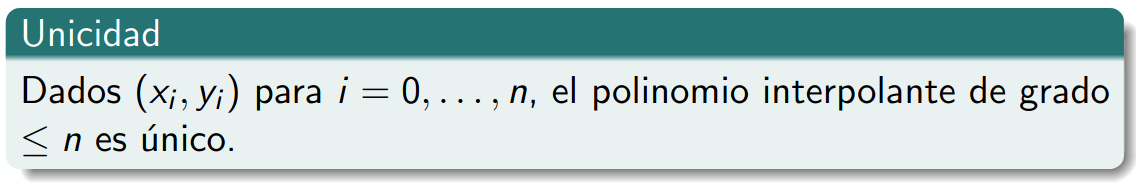
 
Para d = 2, y 3, por unicidad de polinomio interpolante, el mismo es único.

Para d = 4, tomando otro punto, se puede armar un polinomio interpolante entre ellos de lagrange. como hay uno distinto por cada punto (por unicidad), se puede concluir que hay infinitos polinomios interpolantes.

* Para cada valor de $d$, en caso de ser posible, mostrar uno. 

**HINT:** Utilizar el método de diferencias divididas. **OPCIONAL**: Implementar el método de las diferencias divididas para encontrar los coeficientes de los polinomios que recibe eval_poli


* d=2: $3 - 1 (x+1) + 1 (x+1)(x-1)$
* d=3: $3 - 1 (x+1) + 1 (x+1)(x-1) + 0 (x+1)(x-1)(x-2)$ que es igual al d=2
* d=4: $3 - 1 (x+1) + 1 (x+1)(x-1) + 0.1666(x+1)(x-1)(x-2)(x-3)$

In [39]:
x = [-1, 1, 2, 3, 0]
y = [3, 1, 3, 7, 0]

def get_coef(x, y):
    coefs = y.copy()
    n = len(x)
    for i in range(1, n):
        for j in range(n-1, i-1, -1):
            coefs[j] = (coefs[j]-coefs[j-1]) / (x[j]-x[j-i])
    return coefs

get_coef(x,y)

[3, -1.0, 1.0, 0.0, 0.16666666666666674]

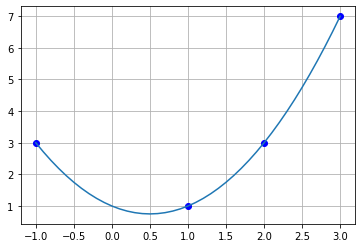

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def eval_poli(xnew, coefs, x):
    evals = []
    for x_val in xnew:
        res = 0 
        for k, coef in enumerate(coefs):
            parcial = 1
            for i in range(k):
                parcial *= (x_val - x[i])
            res += coef * parcial
        evals.append(res)
    return evals


x = np.array([-1, 1, 2, 3])
y = np.array([ 3, 1, 3, 7])

# Mostrar el polinomio encontrado para cada d
coef = get_coef(x,y)
xnew = np.linspace(np.min(x), np.max(x), num=41, endpoint=True)
ynew = eval_poli(xnew, coef, x)

plt.plot(x,y,'bo')
plt.plot(xnew, ynew)
plt.grid()

## Ejercicio 3

Queremos aproximar la función coseno utilizando distintos tipos de splines y el polinomio de Lagrange para luego comparar el error obtenido.

Error Lagrange:0.03171174757248928
Error spline lineal0.7930831940837283


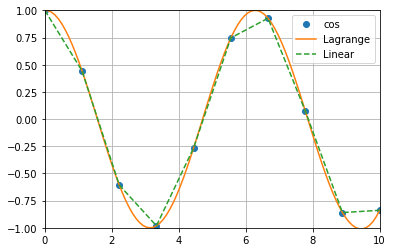

In [55]:
from scipy.interpolate import lagrange

x = np.linspace(0,10,num=10) 
y = np.cos(x)

# Obtengo los polinomios segun los nodos anteriores

linear = interp1d(x, y, kind='linear') 
lagr = lagrange(x, y) 

# Interpolamos en otros puntos

xs = np.linspace(0,10,100)
ys_lagr = lagr(xs)
ys_lin = linear(xs)

# Ploteamos

plt.plot(x, y, 'o', xs, ys_lagr, '-',  xs, ys_lin, '--')
plt.legend(['cos','Lagrange','Linear'], loc='best')
plt.grid(b=True,which='both')
plt.axis([0,10, -1, 1])

# Error

print("Error Lagrange:" + str(np.linalg.norm(np.cos(xs) - ys_lagr)))
print("Error spline lineal" + str(np.linalg.norm(np.cos(xs) - ys_lin)))

* Dada la siguiente tabla de datos que representa la silueta de un **pato**, probar disintos tipos de Splines junto con el polinomio de Lagrange, compararlos entre ellos y con respecto al caso anterior

| x    | 0.9 | 1.3 | 1.9  | 2.1 | 2.6 | 3.0 | 3.9 | 4.4  | 4.7  | 5.0 | 6.0  | 7.0 | 8.0  | 9.2  | 10.5 | 11.3 | 11.6 | 12.0 | 12.6 | 13.0 | 13.3 |
|------|-----|-----|------|-----|-----|-----|-----|------|------|-----|------|-----|------|------|------|------|------|------|------|------|------|
| f(x) | 1.3 | 1.5 | 1.85 | 2.1 | 2.6 | 2.7 | 2.4 | 2.15 | 2.05 | 2.1 | 2.25 | 2.3 | 2.25 | 1.95 | 1.4  | 0.9  | 0.7  | 0.6  | 0.5  | 0.4  | 0.25 |

(0.0, 14.0, -6.0, 4.0)

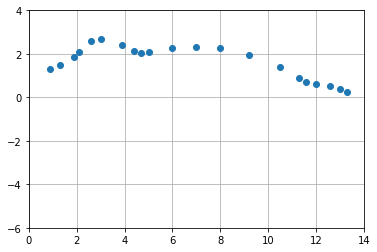

In [56]:
x = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0,
              7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 
              2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

plt.plot(x, y, 'o')
plt.grid(b=True,which='both')
plt.axis([0, 14, -6, 4])

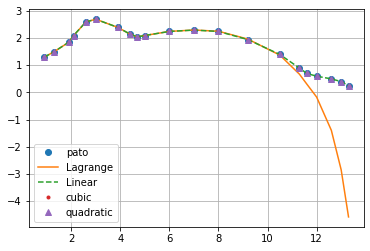

In [68]:
# COMPLETAR
# Obtengo los polinomios segun los nodos anteriores
linear = interp1d(x, y, kind='linear')
lagr = lagrange(x, y) 

cubic = interp1d(x, y, kind='cubic')
quadratic = interp1d(x, y, kind='quadratic')

# Interpolamos en otros puntos
xs = x
ys_lagr = lagr(xs)
ys_lin = linear(xs)
ys_cub = cubic(xs)
ys_cuad = quadratic(xs)

# Ploteamos
plt.plot(x, y, 'o', xs, ys_lagr, '-',  xs, ys_lin, '--', xs, ys_cub, '.', xs, ys_cuad, '^')
plt.legend(['pato','Lagrange','Linear','cubic','quadratic'], loc='best')
plt.grid(b=True,which='both')

## Ejercicio 4

* Deducir la fórmula de Newton-Cotes para $\int_{0}^{1}f(x)dx$ usando como nodos a los puntos $0,1$




**SOLUCIÓN:**

$$f(x) \approx P_n(x)$$
$$f(x) \approx \sum_{i=0}^n f(x_i)*L_{ni}(x)$$
$$\int_a^b f(x) \approx \sum_{i=0}^n f(x_i) \int_a^bL_{ni}(x)$$
basta tomar $a_i = \int_a^bL_{ni}(x)$ (tomando a=0 y b=1)

* Utilizar el punto anterior para integrar $\int_{0}^{1}\exp (-x^{2})dx$

In [ ]:
def f(x):
    
    return 

# Pueden comparar contra esta función de scipy
true_integral = quad(f, 0, 1)[0]
integral = 


## Ejercicio 5

* Indicar cuántos puntos se deben tomar en la aproximación de
$$
\int_{0}^{1}\exp (-x^{2})dx
$$
por medio de la regla de los Trapecios Compuesta para que el error sea menor que $10^{-6}$.

**HINT**: Graficar el modulo de la segunda derivada de $\exp (-x^{2})$

**SOLUCIÓN:**

<font color='red'>**COMPLETAR ACÁ**</font>



* Calcular la aproximacion de la integral y comparar con el Ejercicio anterior

In [ ]:
# COMPLETAR
...
...
...
